# What is machine learning, and how does it work? 

## Agenda

- What is machine learning?
- What are the two main categories of machine learning?
- How does machine learning "work"?
- Machine Learning Terminology
- Categories of Supervised Learning
- ML Pipeline
- How does machine learning "work"?

## What is machine learning?

One definition: "Machine learning is the semi-automated extraction of knowledge from data"

- **Knowledge from data**: Starts with a question that might be answerable using data
- **Automated extraction**: A computer provides the insight
- **Semi-automated**: Requires many smart decisions by a human

## Examples of Artificial Intelligence (AI) in Your Everyday Life

- <b>Apple's iPhone</b>: Apple’s FaceID can see in 3D. It lights up your face and places 30,000 invisible infrared dots on it and captures an image. It then uses machine learning algorithms to compare the scan of your face with what it has stored about your face to determine if the person trying to unlock the phone is you or not. Apple states the chance of fooling FaceID is one in a million.  

- <b>Google Predictive Searches</b>: Most of us can’t go a day without searching Google for an answer or a product we can’t live without. Search engines couldn’t scan the entire internet and deliver what you want without the assistance of artificial intelligence. Those ads that seem to follow you around? Yep, those are enabled by AI, are based on your search history and are personalized to you with the goal of getting items in front of you that the algorithms believe you will value.

- <b>Netflix</b>: At the end of the day, when it's time to kick back and relax, many of us turn to streaming services such as Netflix. The company's recommendation engine is powered by artificial intelligence and uses your past viewing history to deliver suggestions for what you might want to watch (including genres, actors, time periods, and more). 

- <b>Digital Assistants</b>: Apple’s Siri, Google Now, Amazon’s Alexa, and Microsoft’s Cortana are digital assistants that help users perform various tasks, from checking their schedules and searching for something on the web, to sending commands to another app. AI is an important part of how these apps work because they learn from every single user interaction. 

#### Some cool (out of the box) usages of AI/ML:

- <b>Latest Musical Hit</b> : Has it ever occurred to you that artificial intelligence could help create hit songs? The single <b>“Not Easy” by Ambassadors, Elle King, and Wiz Khalifa reached number 4 on iTunes’ Hot Tracks list </b>. So now you must be asking yourself, where was AI used? Well, the single was actually based on findings obtained with big data. Artificial intelligence searched through millions of conversations, newspaper titles, and lectures based on the main theme of the song: heartbreak. Then, after they defined the theme, machine learning algorithms programmed to create music found different musical elements, which gave them ideas on how this piece should sound.

- <b>The Chef With The Most Recipes In The World</b>: If that last point shocked you, now image having a virtual chef by your side next time you cook, guiding you through each step of the recipe to prepare that culinary delight you never thought possible.

 <b>“Chef Watson’s” artificial intelligence</b> will help you create a recipe based on the ingredients you already have or on something you’re craving. Its algorithms will go through which dishes can be prepared with your ingredients and then give you several options so you can choose the dish you want, along with instructions on how to prepare it.

## What are the two main categories of machine learning?

**Supervised learning  (aka “predictive modeling”)**: Making predictions using data 
    
- Predict an outcome based on data
- Example: predict whether an email is spam or “ham”
- Goal is “generalization”

**Unsupervised learning**: Extracting structure from data

- Extracting structure from data
- Example: create segments of voters
- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"
- Goal is “representation”

![Clustering](images/01_clustering.png)

## How does machine learning "work"?

High-level steps of supervised learning:

1. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

2. Then, make **predictions** on **new data** for which the label is unknown

![supervised_learning](images/01_supervised_learning.png)

The primary goal of supervised learning is to build a model that "generalizes": It accurately predicts the **future** rather than the **past**!

![machine_learning_terminology](images/05_machine_learning_knn.jpg)

**Observations** are also known as: samples, examples, instances, records

**Features** are also known as: predictors, independent variables, inputs, regressors, covariates, attributes

**Response** is also known as: outcome, label, target, dependent variable

Note: **Unsupervised learning** does not have a response, and does not require labeled data!

## CATEGORIES OF SUPERVISED LEARNING

There are two categories of supervised learning:

**Regression**
- Response is continuous
- Examples: price, blood pressure

**Classification**
- Response is categorical (values in a finite, unordered set)
- Examples: spam/ham, digit 0-9, cancer class of tissue sample

![machine_learning_pipeline](images/ML_pipeline.png)

## Questions about machine learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

# Introduction to Linear Regression


## Motivation

**Regression problems** are supervised learning problems in which the response is continuous. **Classification problems** are supervised learning problems in which the response is categorical. **Linear regression** is a technique that is useful for regression problems.

So, why are we learning linear regression?

- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

We'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [4]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [6]:
# read data into a DataFrame
data = pd.read_csv('Data/Advertising.csv', index_col=0)
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [7]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

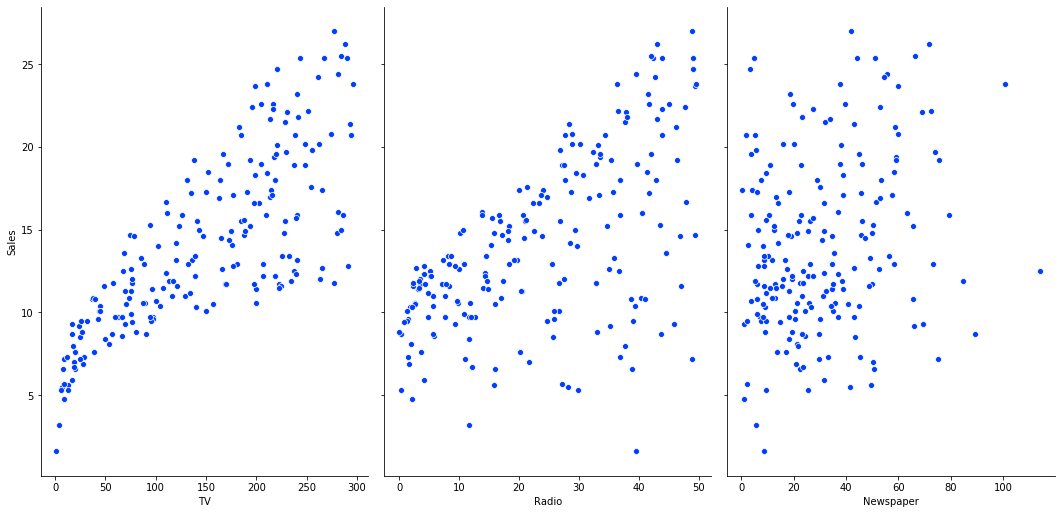

In [13]:
# visualize the relationship between the features and the response using scatterplots
# palette = sns.color_palette("bright")
# Use palplot and pass in the variable:
sns.set_palette("bright")
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, )

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type on sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are finding the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

![Estimating coefficients](images/estimating_coefficients.png)

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

![Slope-intercept](images/slope_intercept.png)

Let's estimate the model coefficients for the advertising data:

In [14]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [16]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [17]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [18]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [21]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(np.array(50).reshape(1,1))

array([9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's plot the least squares line for Sales versus each of the features:

/Users/pacharje/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


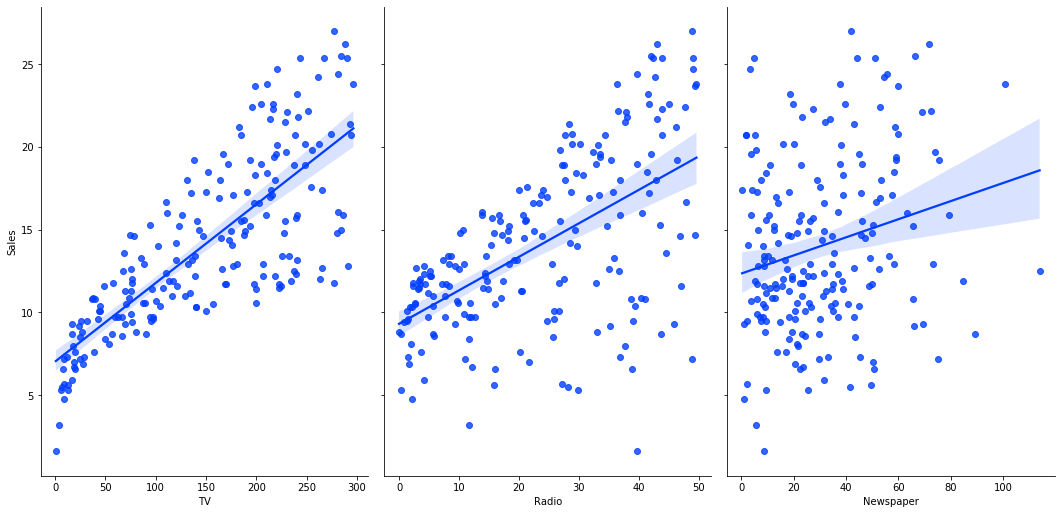

In [22]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![R-squared](images/r_squared.png)

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [23]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [24]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's estimate these coefficients:

In [25]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [27]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [30]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [31]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        13:50:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## What are a few key things we learn from this output?
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's calculate these by hand, to get an intuitive sense for the results:

In [1]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

NameError: name 'metrics' is not defined

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

## When NOT to use ML?

There are three fundamental prerequisites for ML.

- A pattern exists. If there is no pattern there is nothing to look for.
- We cannot mathematically pin down a general expression for the pattern. Therefore an approximation of the actual function is required.
- We have to have data.

If <b> any of the above prerequisites does not hold true, then do not use ML</b>

Some other cues of not to use Machine learning

- You require that the algorithm give you the correct answer 100% of the time.
- You don't have much time (and money)
- You have a simple problem to solve



## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming features to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. 

## Resources

#### AL / ML Degreed Learning Pathway

The training plan has more than 30 self-service, self-paced curated list digital ML/ Data Science courses, videos, and labs for three key groups: developers, data scientists and data platform engineers. Each course starts with the fundamentals, and builds on those through real-world examples and labs, allowing developers to explore machine learning through some fun problems.

-  AI/ML – I ( Basic )          https://degreed.com/paths?path=applied-machine-learning--ml-i---basic-&id=1074280&orgsso=cisco
-  AI/ML – II ( Intermediate )  https://degreed.com/paths?path=applied-machine-learning--ml-ii---intermediate-&id=1166259&orgsso=cisco
-  AI/ML – III ( Advanced )     https://degreed.com/paths?path=applied-machine-learning--ml-iii---advanced-&id=1337988&orgsso=cisco

## Participating in Kaggle Competitions to hone your data science skills

In [37]:
from IPython.display import HTML

HTML('<iframe width="1280" height="720" src="https://www.youtube.com/embed/v4lJBhdCuCU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')